In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../jupyter/environment/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

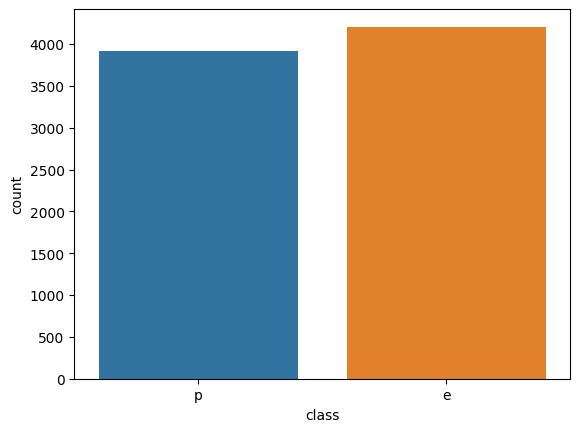

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
feat_uni=df.describe().T.reset_index().sort_values('unique')

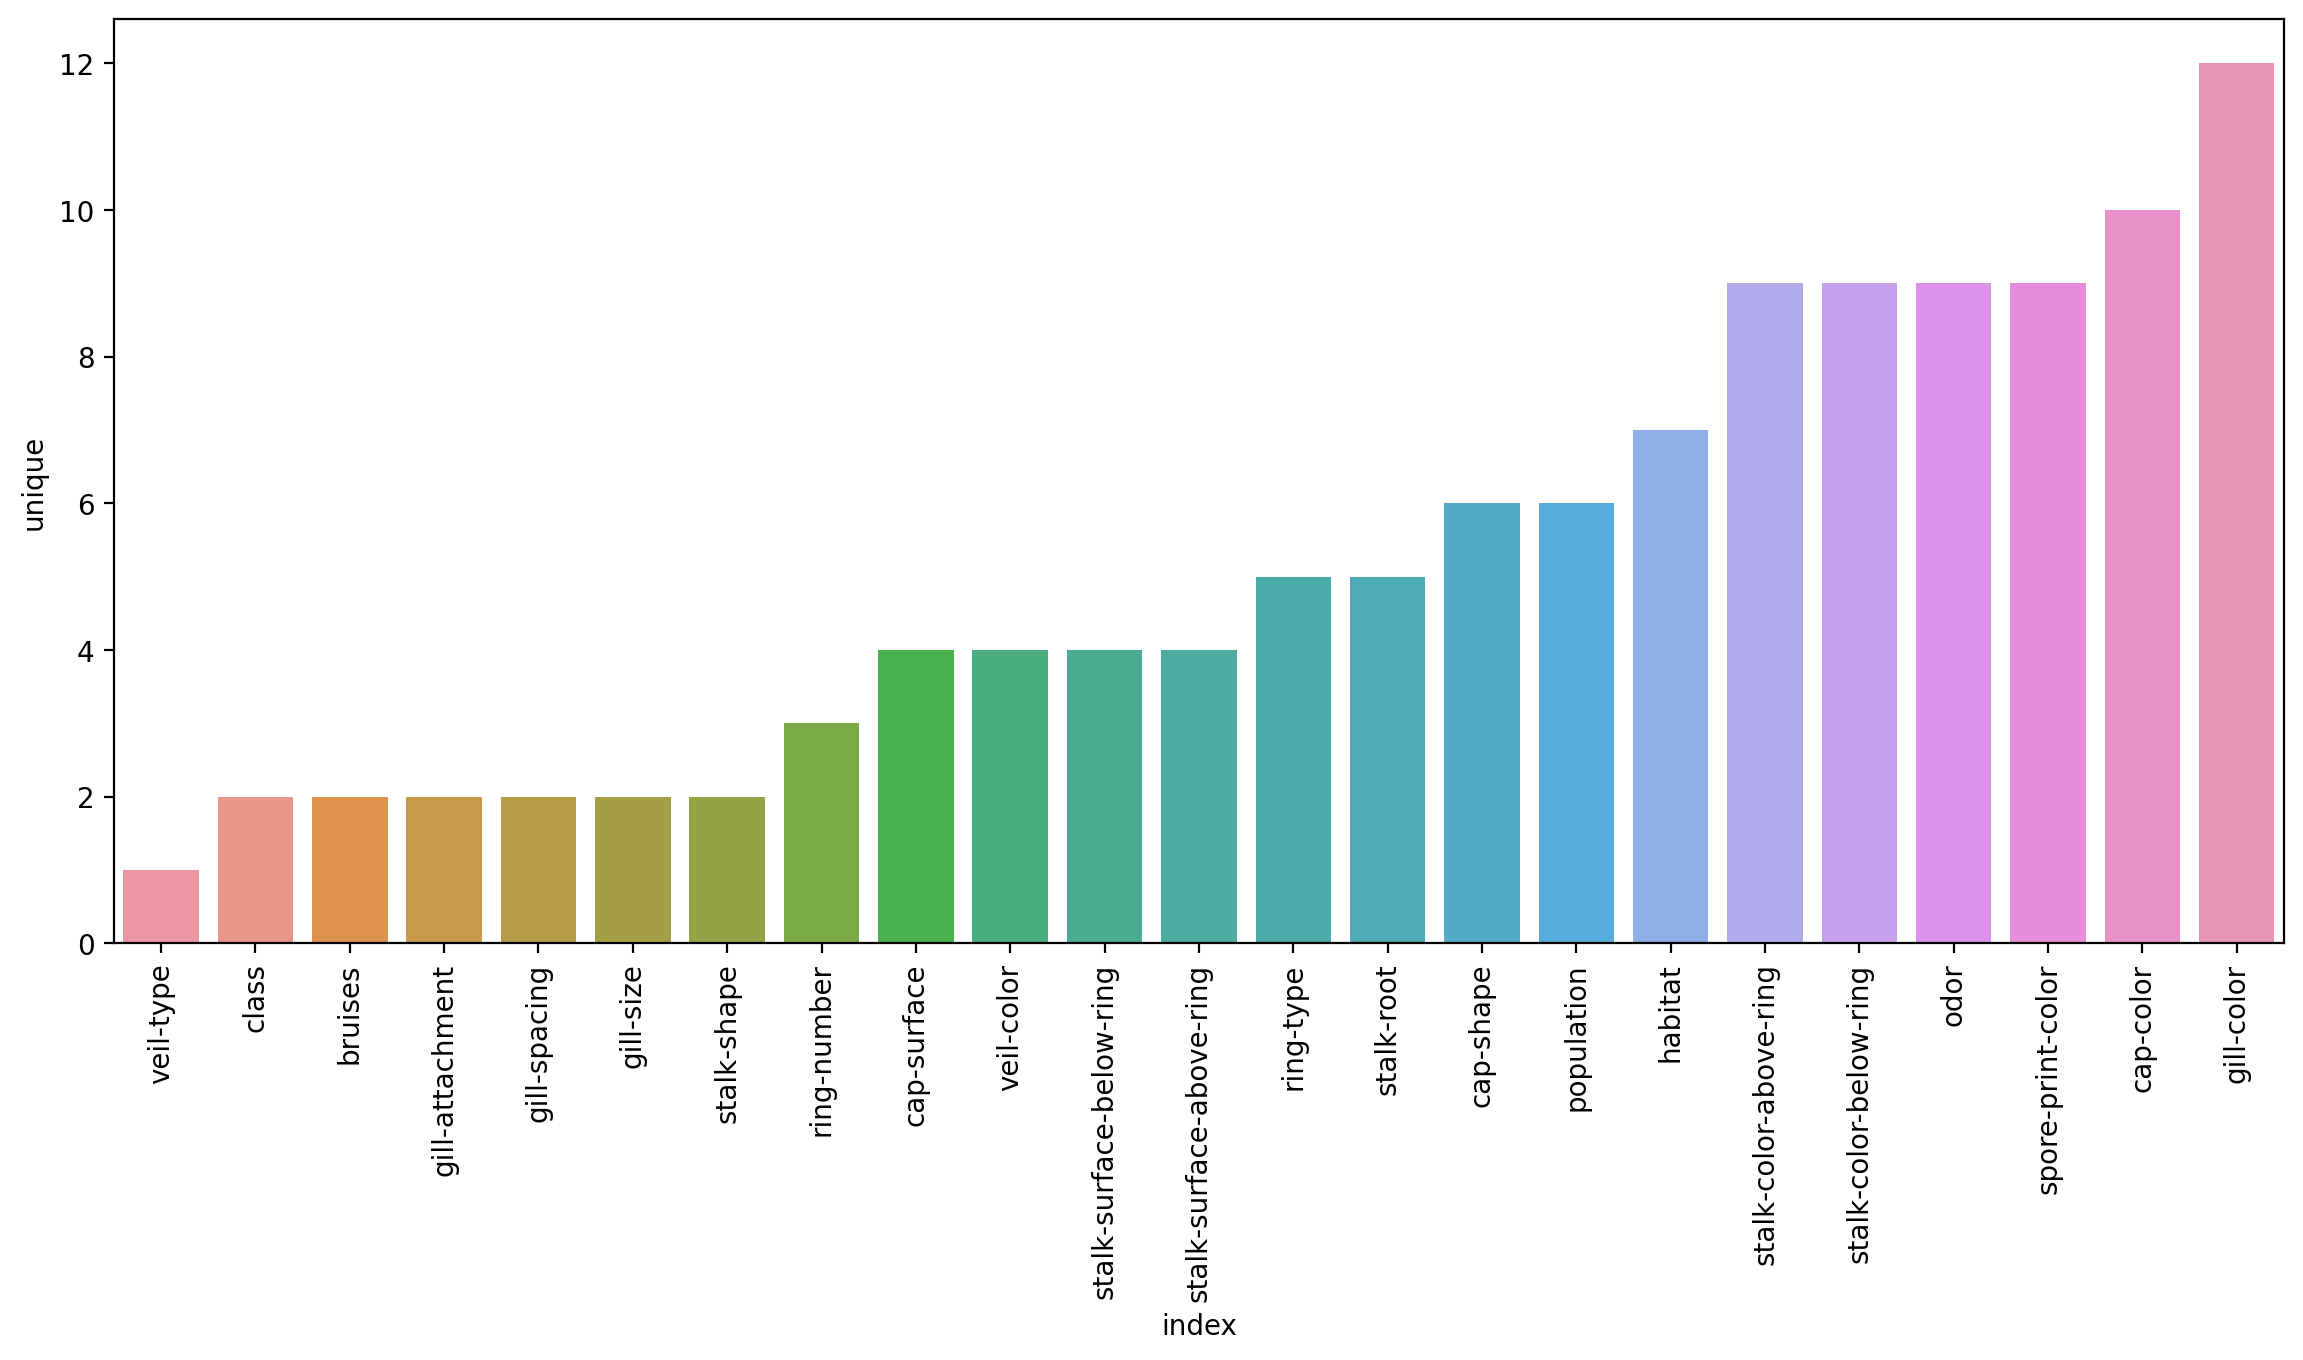

In [7]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90);

In [8]:
X=df.drop('class',axis=1)

In [9]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
X=pd.get_dummies(X,drop_first=True)

In [11]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [12]:
y=df['class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
model=AdaBoostClassifier(n_estimators=1)

In [17]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [19]:
preds=model.predict(X_test)

In [20]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [21]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [22]:
cm=confusion_matrix(y_test,preds)

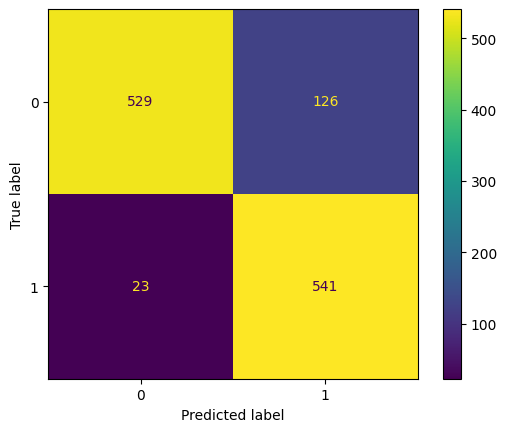

In [24]:
ConfusionMatrixDisplay(cm).plot()

In [25]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
model.feature_importances_.argmax()

22

In [29]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

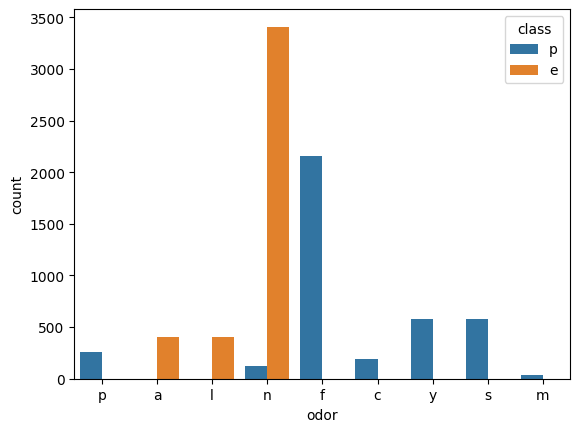

In [31]:
sns.countplot(data=df,x='odor',hue='class')

In [32]:
len(X.columns)

95

In [33]:
errors=[]
for n in range(1,96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    err=1-accuracy_score(y_test,preds)
    errors.append(err)

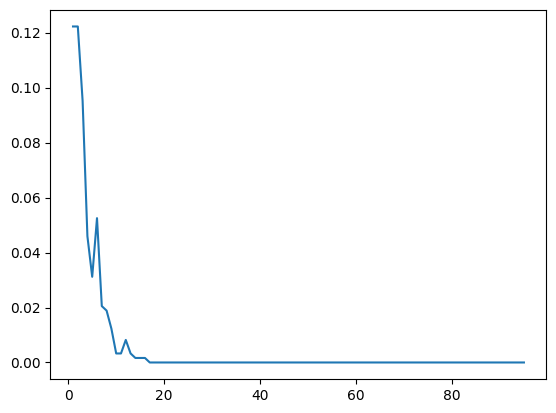

In [34]:
plt.plot(range(1,96),errors)

In [35]:
model

AdaBoostClassifier(n_estimators=95)

In [38]:
model=AdaBoostClassifier(n_estimators=18)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [40]:
feats=pd.DataFrame(model.feature_importances_,index=X.columns)

In [50]:
feats.sort_values(0,ascending=False).head(15)

,0
gill-size_n,0.166667
odor_n,0.111111
population_v,0.111111
spore-print-color_w,0.111111
stalk-surface-below-ring_y,0.055556
population_c,0.055556
odor_p,0.055556
odor_f,0.055556
odor_c,0.055556
bruises_t,0.055556


In [51]:
imp_feats=feats[feats[0]>0]

In [52]:
imp_feats

,0
bruises_t,0.055556
odor_c,0.055556
odor_f,0.055556
odor_n,0.111111
odor_p,0.055556
gill-size_n,0.166667
stalk-surface-above-ring_k,0.055556
stalk-surface-below-ring_y,0.055556
stalk-color-below-ring_n,0.055556
spore-print-color_r,0.055556


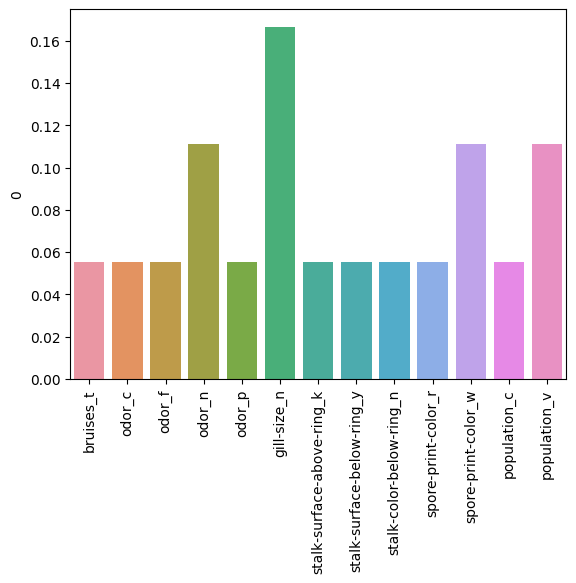

In [56]:
plt.figure()
sns.barplot(data=imp_feats,x=imp_feats.index,y=0)
plt.xticks(rotation=90);

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
model=GradientBoostingClassifier()

In [60]:
param_grid={'n_estimators':[50,100],
           'learning_rate':[0.1,0.05,0.2],
           'max_depth':[3,4,5]}

In [61]:
grid=GridSearchCV(model,param_grid)

In [62]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [63]:
preds=grid.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [64]:
grid.best_estimator_

GradientBoostingClassifier()

In [65]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [67]:
feat_IMP=grid.best_estimator_.feature_importances_

In [86]:
df=pd.DataFrame(data=feat_IMP,index=X.columns).sort_values(0,ascending=False)

In [89]:
df=df[df[0]>1e-3]


In [90]:
df

,0
odor_n,0.614763
stalk-root_c,0.136009
bruises_t,0.052736
stalk-root_r,0.050169
spore-print-color_r,0.030495
odor_l,0.018250
stalk-surface-below-ring_y,0.016276
gill-spacing_w,0.012509
spore-print-color_h,0.011180
gill-size_n,0.011141


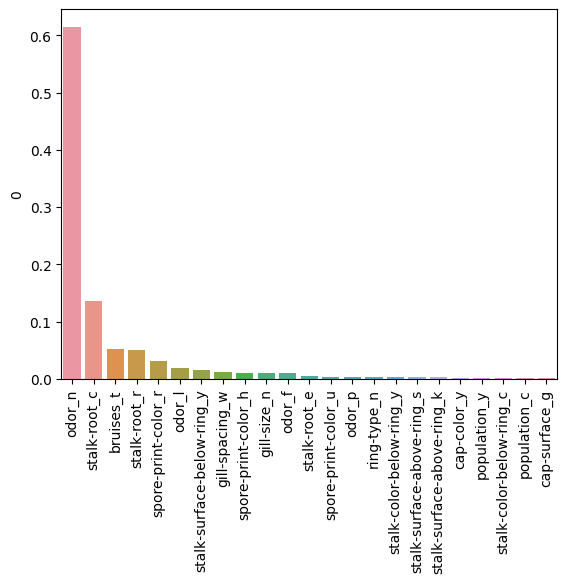

In [94]:
plt.figure()
sns.barplot(df,x=df.index,y=df[0])
plt.xticks(rotation=90);